# Caso Regresión: Compañía Sector Textil

## 1. Entendimiento del Problema

Garments Industry es una compañia del sector textil con mu8hcas actividades manuales. Su éxito está en que las prendas son "hechas a mano", por lo que medir la productividad de sus empleados se vuelve esencial para mejorar las utilidades de la organización. Es por esto que la compañía quiere estimar los niveles de productivdiad de sus empleados para mejorare la operación y mantener los ingresos esperados, además, identificar herramientas para mejorar el día a día de sus empleados

## 2. Enfoque analítico

Construir un modelo de regresión para predecir la productividad de cada empleado con un AMEP menro al al 20% (Probabilidad superario al 80%)

## 3. Requerminientos de Datos

- Se requieren datos del trabajador en su puesto de trabajo particular
- Se requieren mediciones del puesto de trabajo (tiempos, cantidad de prendas, momentos de ocio, cantidad de personas)
- Se requiere una medición inicial de la productividad

# 4. Recolección de Datos

- date: Fecha de medición de la productividad
- quarter: Trimestre de la medición
- department: Área de trabajo en particular
- day: Nombre del día en el que se hizo la medición
- team: Número del equipo de trabajo
- target_productivity: Productividad objetivo del área de trabajo
- smv: Valor de tiempo estándar en minutos de la actividad
- wip: Cantidad de trabajo en proceso (Unidades)
- over_time: Tiempo de operación
- incentive: Porcentaje de incentivos al área de trabajo
- idle_time: Tiempo de parada
- idle_men: Cantidad de trabajadors quietos en el tiempo de aparada
- no_of_style_change: Cantidad de cambios de estilo en la producción
- no_of_workers: Cantidad total de trabajadores
- actual_productivity: Productividad actual (y)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Datos/garments_worker_productivity.csv')
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# 5. Entendimiento de los Datos

### Datos Nulos

La variable "wip" se debería eliminar en términos estadísticos pero es muy importante para el caso del negocio

<Axes: >

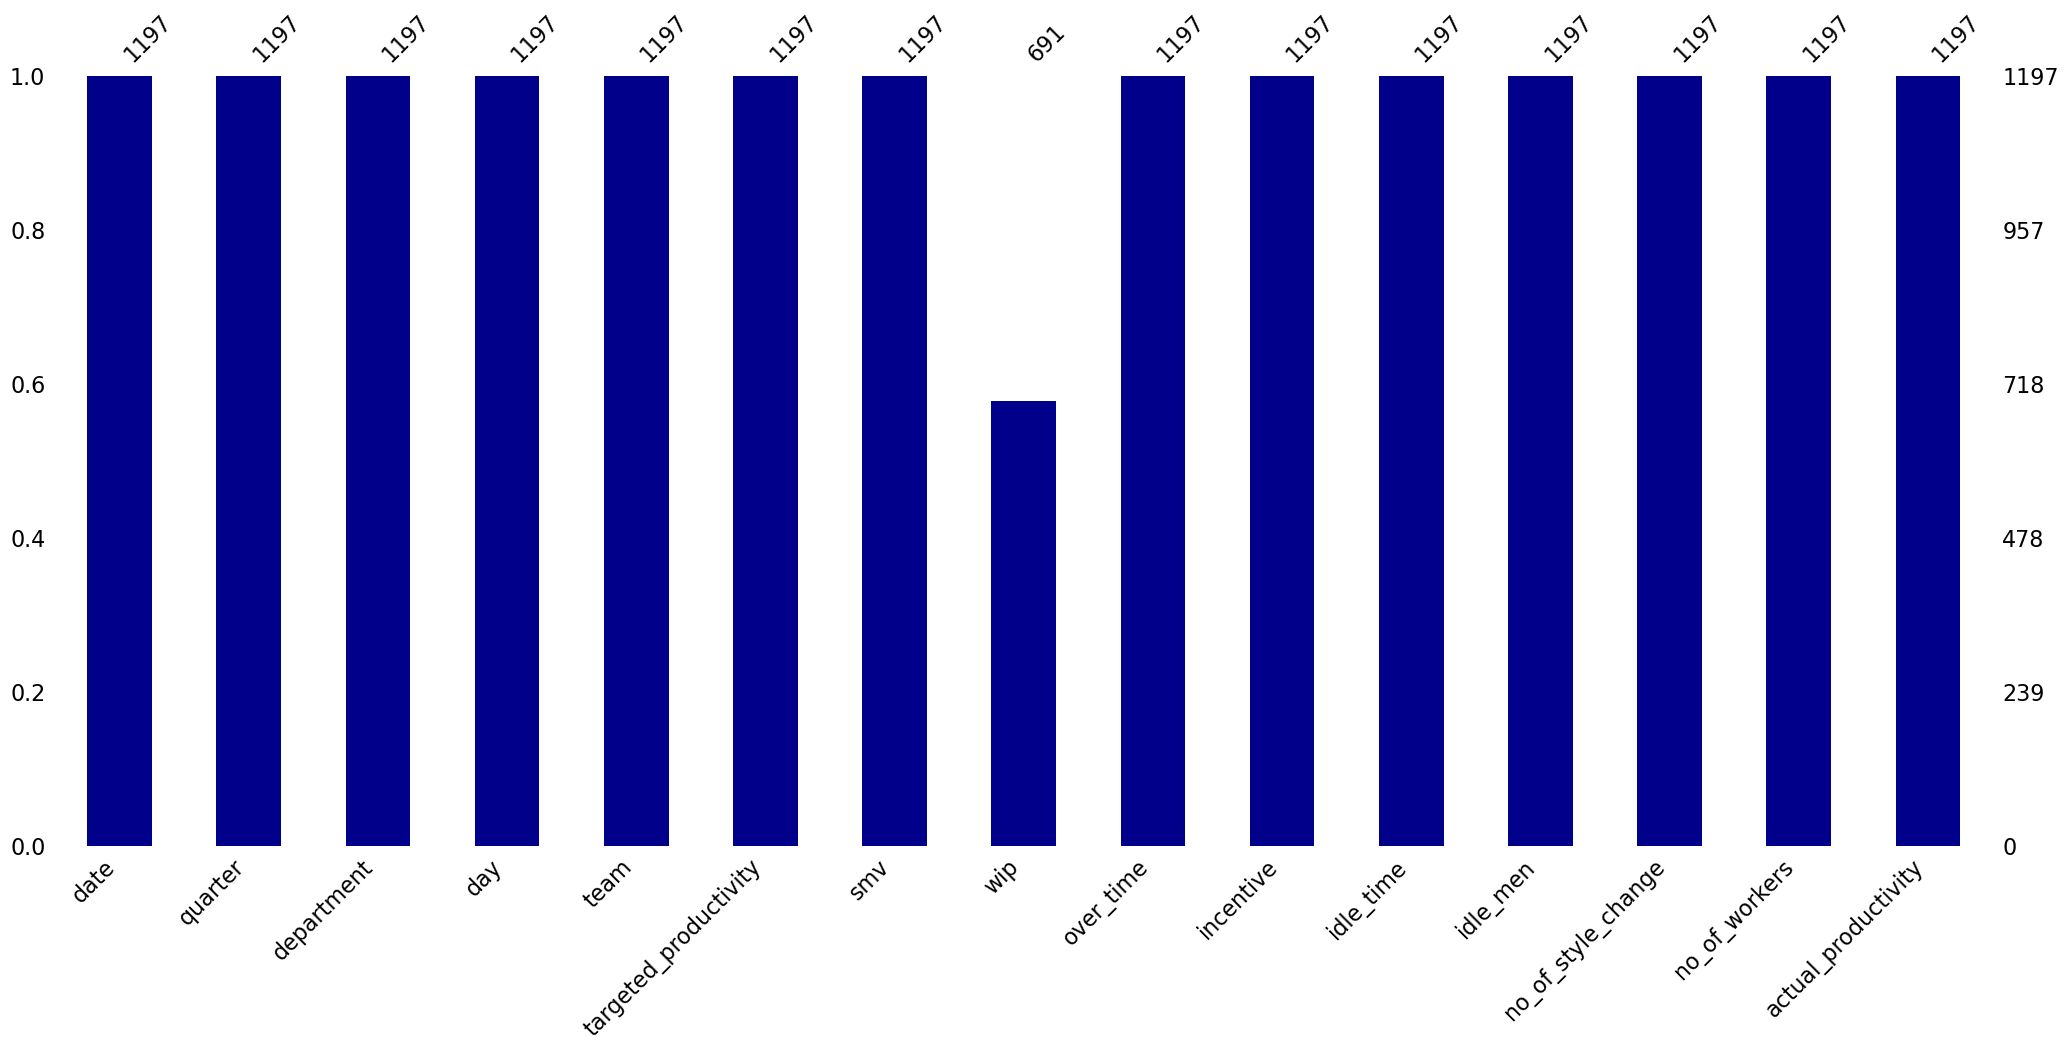

In [3]:
msno.bar(data, color="darkblue")

### Análisis de variable Y

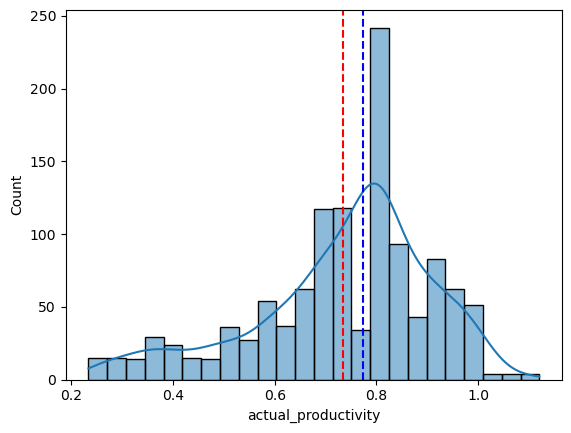

In [4]:
sns.histplot(data, x = "actual_productivity", kde=True)
plt.axvline(data["actual_productivity"].mean(), color='red', linestyle='--')
plt.axvline(data["actual_productivity"].median(), color='blue', linestyle='--')
plt.show(9)

### Histogramas de Frecuencia

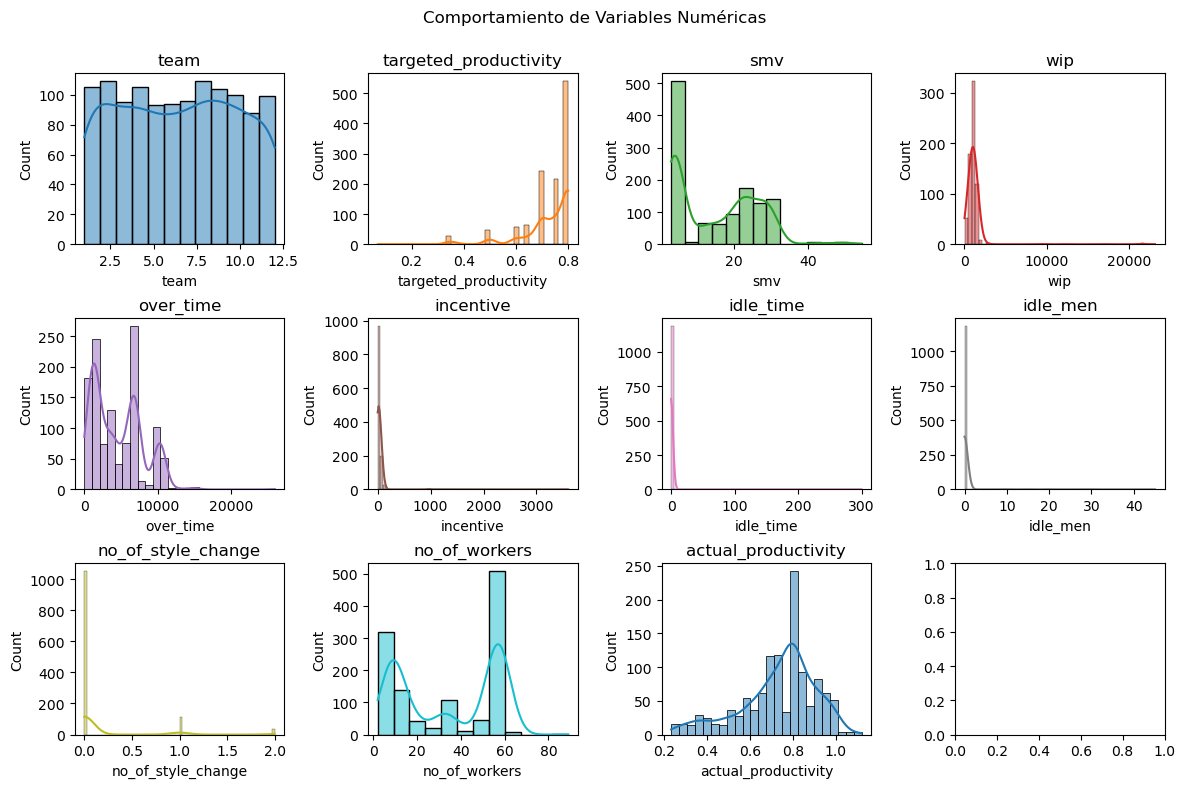

In [5]:
fig, ax = plt.subplots(3, 4, figsize = (12, 8))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sns.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

### Gráficos de Torta

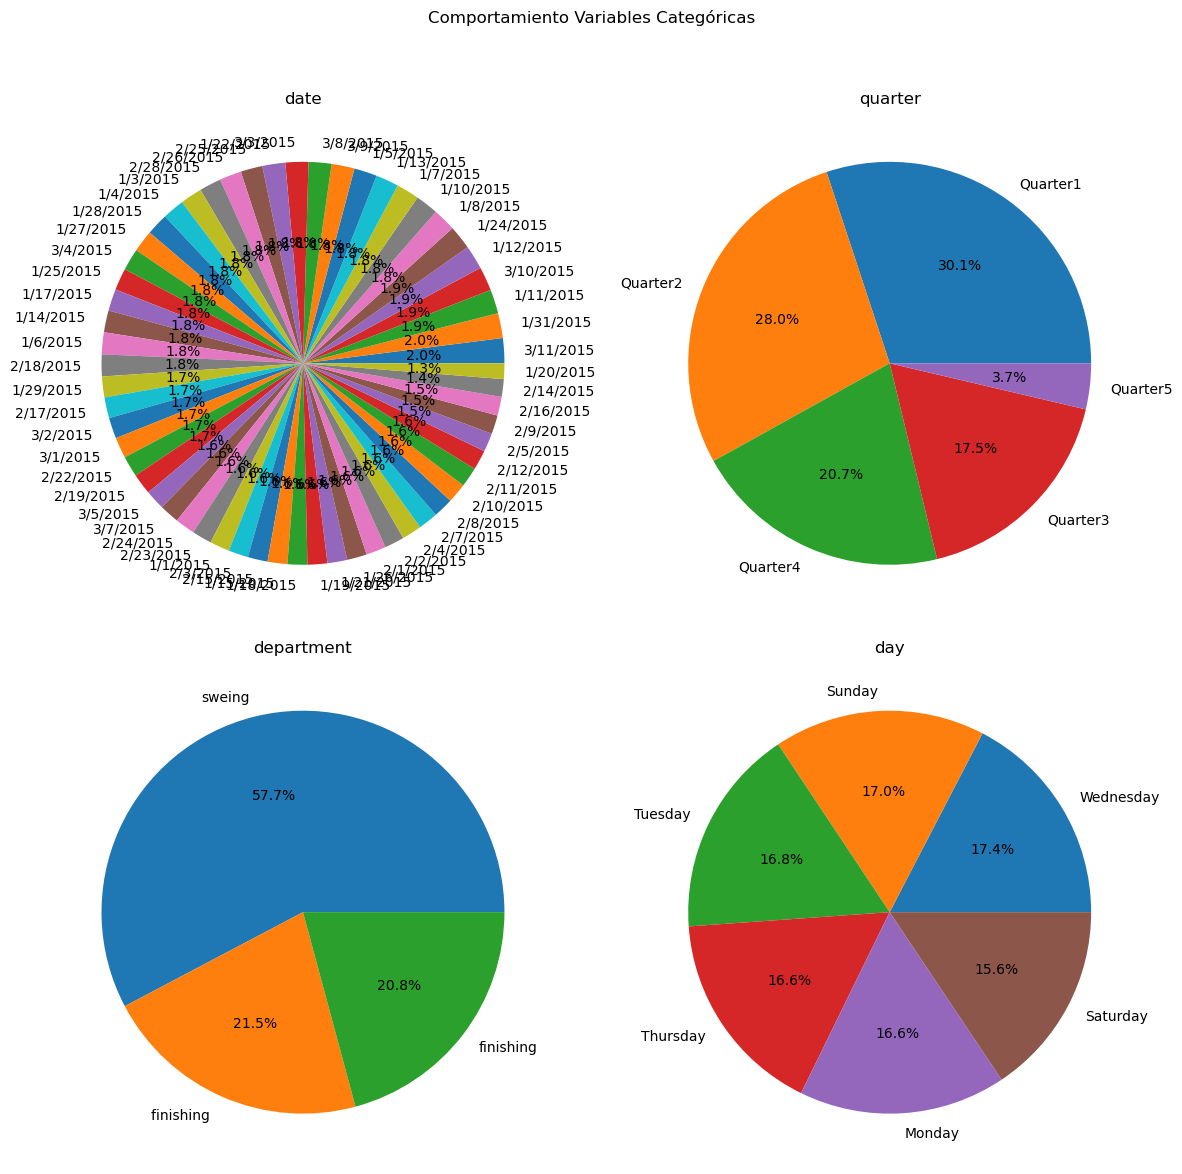

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

### Factor de Correlación

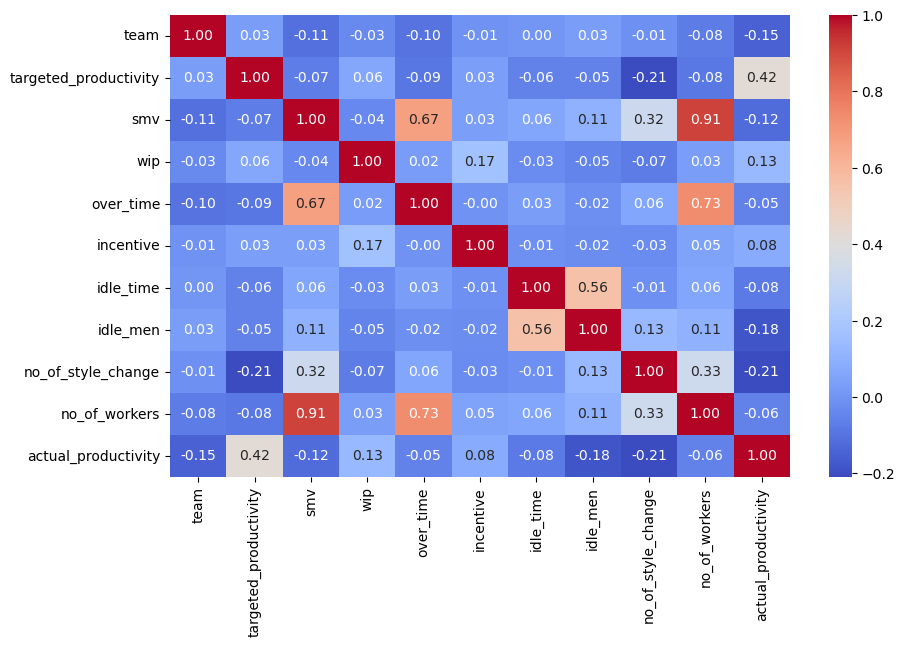

In [7]:
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## 6. Preparación de los datos

### Transformación Ordinal

In [8]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

In [9]:
categorical_cols = data.select_dtypes(include = ['object']).columns
categorical_transformer = make_column_transformer((OrdinalEncoder(), categorical_cols), remainder="passthrough")
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['date', 'quarter', 'department', 'day'], dtype='object'))])

In [10]:
data_transformed = pd.DataFrame(categorical_transformer.fit_transform(data), 
                                columns = categorical_transformer.get_feature_names_out(),
                                index = data.index).rename(
                                    columns = lambda x: x.removeprefix('ordinalencoder__')).rename(
                                    columns = lambda x: x.removeprefix ('remainder__')
                                    )

data_transformed                                

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.0,0.0,2.0,3.0,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0,0.940725
1,0.0,0.0,1.0,3.0,1.0,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,0.0,0.0,2.0,3.0,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,0.0,0.0,2.0,3.0,12.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,0.0,0.0,2.0,3.0,6.0,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51.0,1.0,0.0,5.0,10.0,0.75,2.90,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,51.0,1.0,0.0,5.0,8.0,0.70,3.90,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,51.0,1.0,0.0,5.0,7.0,0.65,3.90,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,51.0,1.0,0.0,5.0,9.0,0.75,2.90,NaN,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


### Imputación

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [12]:
imputer = IterativeImputer(estimator=DecisionTreeRegressor(),
                           initial_strategy='mean',
                           max_iter=10)

data_recursive = pd.DataFrame(imputer.fit_transform(data_transformed), 
                              columns=data_transformed.columns,
                              index=data_transformed.index)

data_recursive

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.0,0.0,2.0,3.0,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0,0.940725
1,0.0,0.0,1.0,3.0,1.0,0.75,3.94,813.0,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,0.0,0.0,2.0,3.0,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,0.0,0.0,2.0,3.0,12.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,0.0,0.0,2.0,3.0,6.0,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51.0,1.0,0.0,5.0,10.0,0.75,2.90,529.0,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,51.0,1.0,0.0,5.0,8.0,0.70,3.90,529.0,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,51.0,1.0,0.0,5.0,7.0,0.65,3.90,529.0,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,51.0,1.0,0.0,5.0,9.0,0.75,2.90,529.0,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


In [13]:
data_imputed = data_recursive.copy()
data_imputed[categorical_cols] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X = data_recursive[categorical_cols]))

<Axes: >

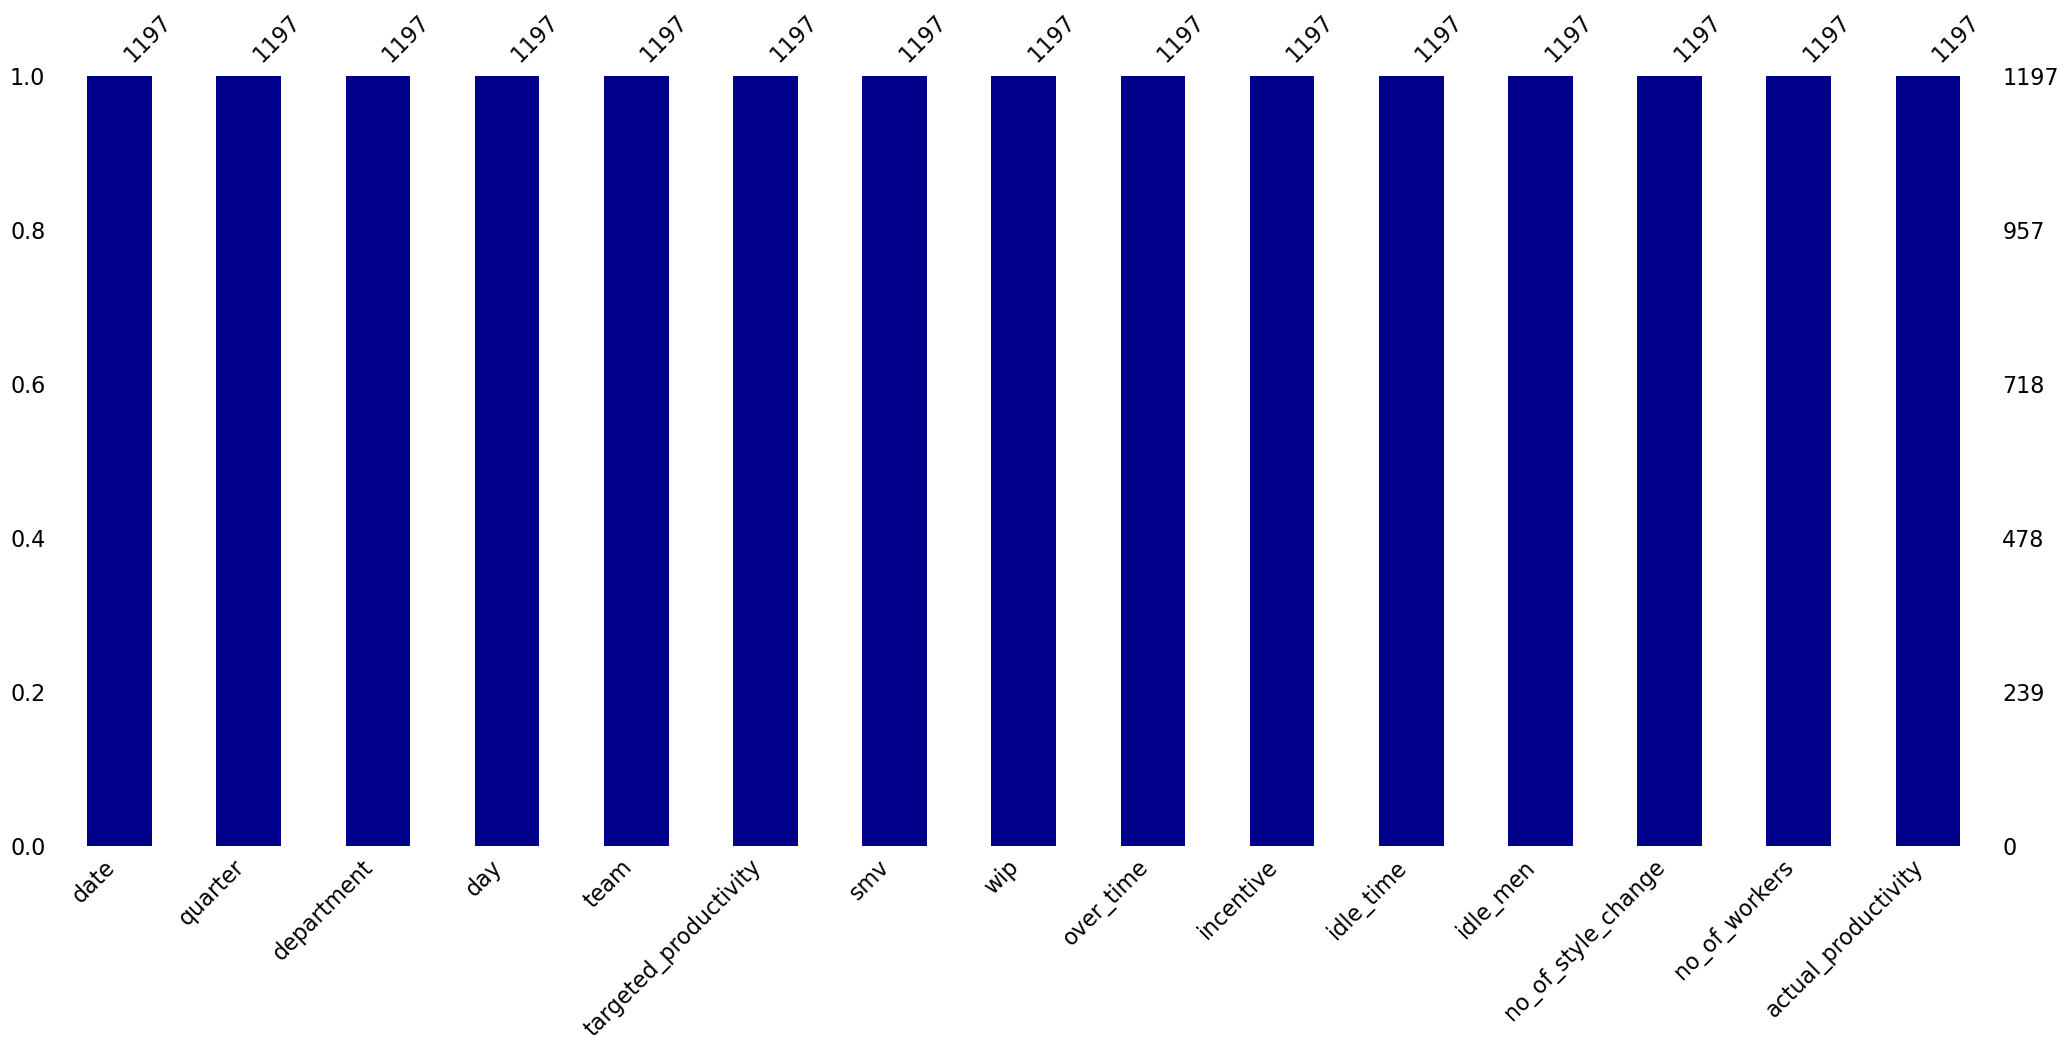

In [14]:
msno.bar(data_imputed, color="darkblue")

### Eliminar variables

In [15]:
data_imputed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1162.609858,2196.710988,7.000000,581.000000,925.000000,1216.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [16]:
data_mod = data_imputed.drop(columns = ['team', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'incentive'])

In [17]:
data_mod = data_imputed.drop(['team', 'no_of_style_change', 'no_of_workers', 'incentive', 'idle_men', 'idle_time'], axis=1)
data_mod['department'].replace({'finishing ': 'finishing'}, inplace=True)
data_mod['date'] = pd.to_datetime(data_mod['date'], format='%m/%d/%Y')
data_mod['num_day'] = [i.day for i in data_mod.date]
data_mod['month'] = [i.month for i in data_mod.date]
data_mod.drop('date', axis=1, inplace=True)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   targeted_productivity  1197 non-null   float64
 4   smv                    1197 non-null   float64
 5   wip                    1197 non-null   float64
 6   over_time              1197 non-null   float64
 7   actual_productivity    1197 non-null   float64
 8   num_day                1197 non-null   int64  
 9   month                  1197 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 93.6+ KB


### Transformación de los datos

In [18]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
num_col = data_mod.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = data_mod.select_dtypes(include = ['object']).columns.to_list()

numtrans = Pipeline(steps=[("scale", MinMaxScaler())])
cattrans = Pipeline(steps=[("encoder", OneHotEncoder(sparse_output=True))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numtrans, num_col),
        ('cat', cattrans, cat_col)
    ],
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 ['targeted_productivity', 'smv', 'wip',
                                  'over_time', 'actual_productivity', 'num_day',
                                  'month']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['quarter', 'department', 'day'])])

In [20]:
data_pre = preprocessor.fit_transform(data_mod)
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate((num_col, cod_cat))
data_pro = pd.DataFrame(data_pre, columns=labels)
data_pro

,targeted_productivity,smv,wip,over_time,actual_productivity,num_day,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1.000000,0.450252,0.047631,0.273148,0.797332,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.931507,0.020132,0.034869,0.037037,0.736180,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.164731,0.041575,0.141204,0.639274,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.000000,0.164731,0.041575,0.141204,0.639274,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.000000,0.445219,0.050314,0.074074,0.639062,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.931507,0.000000,0.022583,0.037037,0.445036,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1193,0.863014,0.019357,0.022583,0.037037,0.441982,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1194,0.794521,0.019357,0.022583,0.037037,0.441982,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1195,0.931507,0.000000,0.022583,0.069444,0.306951,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Conjunto de Entrenamiento

In [21]:
from sklearn.model_selection import train_test_split

El tamaño del conjunto de entrenamiento es (837, 19) (837, 1)
El tamaño del conjunto de validación es (360, 19) (360, 1)


<Axes: xlabel='actual_productivity', ylabel='Count'>

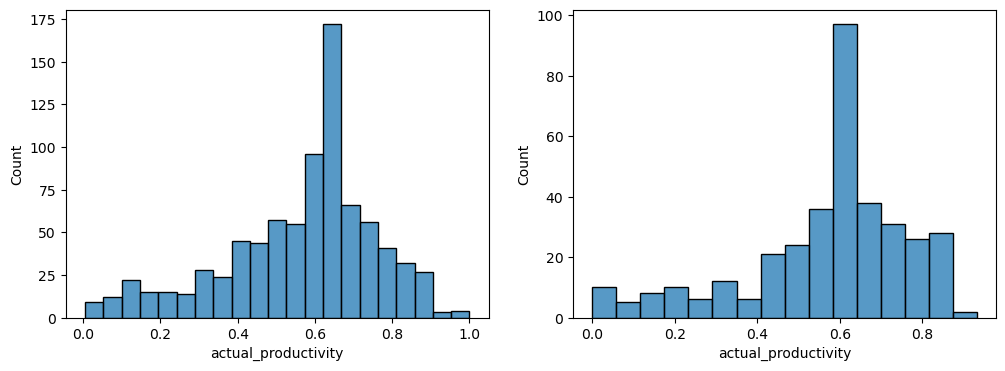

In [22]:
X = data_pro.drop('actual_productivity', axis=1)
y = data_pro[['actual_productivity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
print(f'El tamaño del conjunto de entrenamiento es {X_train.shape} {y_train.shape}\nEl tamaño del conjunto de validación es {X_test.shape} {y_test.shape}')
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=y_train, x='actual_productivity', ax=ax[0])
sns.histplot(data=y_test, x='actual_productivity', ax=ax[1])

## Modelado

**VLAIDACIÓN**

- MAPE: En promedio cuantas veces se equivoca
- R^2: UN R2 negativo es probable, me explica que tan lejanos están mis datos de la predicción 
- MSE: 
- RMSE:
- MAE: 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Regresión Lineal

**La regresión lineal no teiene busqueda de híperparametros**

In [24]:
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)

LinearRegression()

In [25]:
modelo_1.coef_

array([[ 5.63129197e-01, -1.58670513e-01,  1.83520230e-01,
         1.27100003e-01, -2.23794068e-02, -2.95433550e-02,
        -1.65615840e-02, -4.73770050e-03, -5.12895416e-02,
        -3.07734255e-02,  1.03362252e-01, -1.03425998e-02,
         1.03425998e-02, -6.40580176e-03, -1.65114372e-04,
        -2.17529379e-02, -1.52846189e-02,  3.04692339e-02,
         1.31392391e-02]])

In [26]:
modelo_1.intercept_

array([0.09968603])

Nos podríamos saltar test 

In [27]:
pred_train_1 = modelo_1.predict(X_train)
pred_test_1 = modelo_1.predict(X_test)

pred_train_desc1 = pred_train_1 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc1 = pred_test_1 * (np.max(y) - np.min(y)) + np.min(y)

y_train_desc = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc = y_test * (np.max(y) - np.min(y)) + np.min(y)

r2_train1 = r2_score(y_train_desc, pred_train_desc1)
rmse_train1 = np.sqrt(mean_squared_error(y_train_desc, pred_train_desc1))
mae_train1 = mean_absolute_error(y_train_desc, pred_train_desc1)
mape_train1 = mean_absolute_percentage_error(y_train_desc, pred_train_desc1)

print('metricas de desempeño de entrenamiento para la regresion lineal')
print(f'R2: {r2_train1}\nRMSE: {rmse_train1}\nMAE: {mae_train1}\nMAPE: {mape_train1}')

metricas de desempeño de entrenamiento para la regresion lineal
R2: 0.2260243964122196
RMSE: 0.1720613152212057
MAE: 0.121864624326199
MAPE: 0.7468109822768372


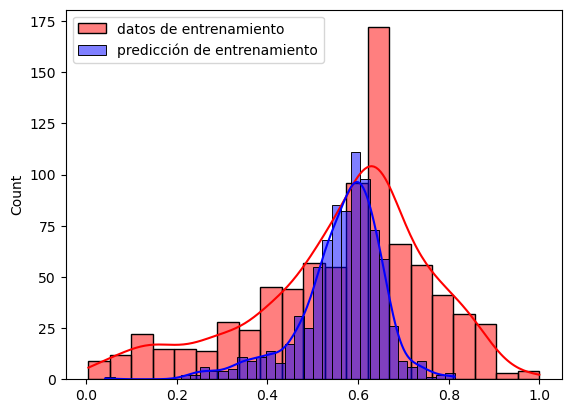

In [28]:
sns.histplot(y_train_desc.values.flatten(), color='red', label='datos de entrenamiento', kde=True)
sns.histplot(pred_train_desc1.flatten(), color='blue', label='predicción de entrenamiento', kde=True)
plt.legend()
plt.show()


metricas de desempeño de prueba para la regresion lineal
R2: 0.2008624342187345
RMSE: 0.17793667650863768
MAE: 0.1293060156680618
MAPE: 6322842729552.668


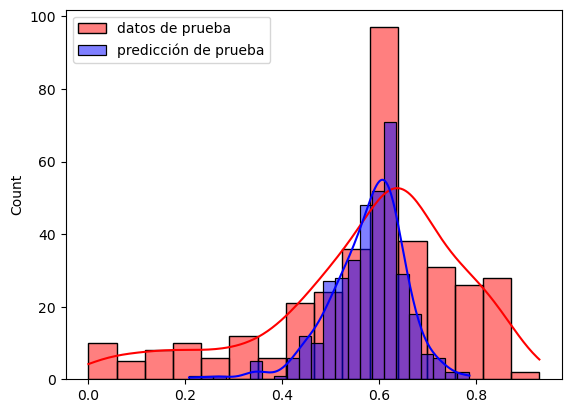

In [29]:
r2_test1 = r2_score(y_test_desc, pred_test_desc1)
rmse_test1 = np.sqrt(mean_squared_error(y_test_desc, pred_test_desc1))
mae_test1 = mean_absolute_error(y_test_desc, pred_test_desc1)
mape_test1 = mean_absolute_percentage_error(y_test_desc, pred_test_desc1)

print('metricas de desempeño de prueba para la regresion lineal')
print(f'R2: {r2_test1}\nRMSE: {rmse_test1}\nMAE: {mae_test1}\nMAPE: {mape_test1}')

sns.histplot(y_test_desc.values.flatten(), color='red', label='datos de prueba', kde=True)
sns.histplot(pred_test_desc1.flatten(), color='blue', label='predicción de prueba', kde=True)
plt.legend()
plt.show()


### K-Vecinos 

Identifica un valor con le media de sus N vecinos, a diferencia de la clasificación donde era la moda de los vecinos acá es la media 
MISMOS HÍPERPARAMETROS

Vecinos
Distancia: 1 manhatan, 2 euclidiana


In [30]:
modelo_2 = KNeighborsRegressor()

param_grid = {'n_neighbors': [2,3, 5, 12, 21, 30, 35, 36, 34, 37 , 38 ,40 ,100], 'p': [1, 2]}

reg_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')
reg_2.fit(X_train, y_train)

validation = pd.concat([pd.DataFrame(reg_2.cv_results_['params']),
                        pd.DataFrame(reg_2.cv_results_['mean_test_score'], columns=['MAPE'])], axis=1)
validation.sort_values('MAPE', ascending=False)

,n_neighbors,p,MAPE
13,35,2,-0.824274
23,40,2,-0.824735
17,34,2,-0.824853
15,36,2,-0.825575
11,30,2,-0.826206
19,37,2,-0.827447
21,38,2,-0.827613
14,36,1,-0.830077
18,37,1,-0.832274
20,38,1,-0.833116


In [31]:
modelo_2 = KNeighborsRegressor()

param_grid = {'n_neighbors': [2,3, 5, 12, 21, 30, 35, 36, 34, 37 , 38 ,40 ,100], 'p': [1, 2]}

reg_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
reg_2.fit(X_train, y_train)

validation = pd.concat([pd.DataFrame(reg_2.cv_results_['params']),
                        pd.DataFrame(reg_2.cv_results_['mean_test_score'], columns=['MAPE'])], axis=1)
validation.sort_values('MAPE', ascending=False)

,n_neighbors,p,MAPE
9,21,2,0.109245
8,21,1,0.102026
10,30,1,0.096181
11,30,2,0.089151
17,34,2,0.086514
16,34,1,0.084453
12,35,1,0.084009
14,36,1,0.083658
13,35,2,0.081979
18,37,1,0.081539


En la validación debemos encontrar el mape más grande, más cercano a cero 

In [32]:
modelo_2_final = reg_2.best_estimator_
modelo_2_final

KNeighborsRegressor(n_neighbors=21)

metricas de desempeño de prueba para la regresion lineal
R2: 0.13890899062525297
RMSE: 0.18148641836054086
MAE: 0.13919367357568688
MAPE: 0.8185243533037764


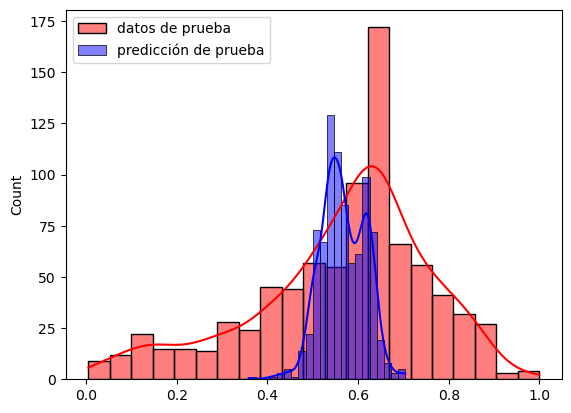

In [33]:
pred_train_2 = modelo_2_final.predict(X_train)
pred_test_2 = modelo_2_final.predict(X_test)

pred_train_desc2 = pred_train_2 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc2 = pred_test_2 * (np.max(y) - np.min(y)) + np.min(y)

y_train_desc2 = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc2 = y_test * (np.max(y) - np.min(y)) + np.min(y)

r2_train2 = r2_score(y_train_desc2, pred_train_desc2)
rmse_train2 = np.sqrt(mean_squared_error(y_train_desc2, pred_train_desc2))
mae_train2 = mean_absolute_error(y_train_desc2, pred_train_desc2)
mape_train2 = mean_absolute_percentage_error(y_train_desc2, pred_train_desc2)

print('metricas de desempeño de prueba para la regresion lineal')
print(f'R2: {r2_train2}\nRMSE: {rmse_train2}\nMAE: {mae_train2}\nMAPE: {mape_train2}')

sns.histplot(y_train_desc2.values.flatten(), color='red', label='datos de prueba', kde=True)
sns.histplot(pred_train_desc2.flatten(), color='blue', label='predicción de prueba', kde=True)
plt.legend() 
plt.show()

metricas de desempeño de TEST para la regresion lineal
R2: 0.038908151289426374
RMSE: 0.19513588765613885
MAE: 0.15014064058274937
MAPE: 6560684809215.718


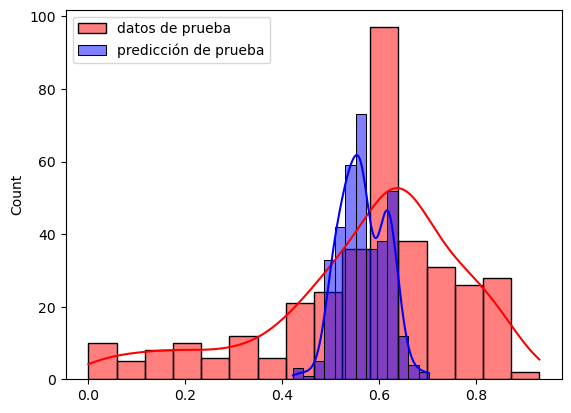

In [34]:
r2_test2 = r2_score(y_test_desc2, pred_test_desc2)
rmse_test2 = np.sqrt(mean_squared_error(y_test_desc2, pred_test_desc2))
mae_test2 = mean_absolute_error(y_test_desc2, pred_test_desc2)
mape_test2 = mean_absolute_percentage_error(y_test_desc2, pred_test_desc2)

print('metricas de desempeño de TEST para la regresion lineal')
print(f'R2: {r2_test2}\nRMSE: {rmse_test2}\nMAE: {mae_test2}\nMAPE: {mape_test2}')

sns.histplot(y_test_desc2.values.flatten(), color='red', label='datos de prueba', kde=True)
sns.histplot(pred_test_desc2.flatten(), color='blue', label='predicción de prueba', kde=True)
plt.legend() 
plt.show()

### SVM
En clasificación expulsamos a las clasificaciones del envolvente  
En la regresión intentamos antes que los datos se capturen   
Son los mismos híperparametros: C tasa de error (>0), Kernel, 


In [35]:
modelo_3 = SVR()

param_grid = {'C': [0, 0.001, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3]}

reg_3 = GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')
reg_3.fit(X_train, y_train)

validation = pd.concat([pd.DataFrame(reg_3.cv_results_['params']),
                        pd.DataFrame(reg_3.cv_results_['mean_test_score'], columns=['MAPE'])], axis=1)
validation.sort_values('MAPE', ascending=False)

,C,degree,kernel,MAPE
31,100.000,2,poly,-0.759131
21,1.000,3,linear,-0.761096
18,1.000,2,linear,-0.761096
27,10.000,3,linear,-0.761900
24,10.000,2,linear,-0.761900
33,100.000,3,linear,-0.761970
30,100.000,2,linear,-0.761970
28,10.000,3,poly,-0.766646
25,10.000,2,poly,-0.769121
22,1.000,3,poly,-0.771956


In [36]:
modelo_3_final = reg_3.best_estimator_
modelo_3_final

SVR(C=100, degree=2, kernel='poly')

metricas de desempeño de prueba para la regresion lineal
R2: 0.44887046412295073
RMSE: 0.14519325635434932
MAE: 0.1046238360731965
MAPE: 0.670577260982477


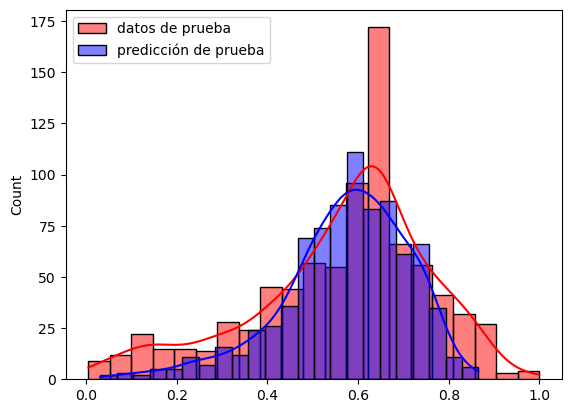

In [37]:
pred_train_3 = modelo_3_final.predict(X_train)
pred_test_3 = modelo_3_final.predict(X_test)

pred_train_desc3 = pred_train_3 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc3 = pred_test_3 * (np.max(y) - np.min(y)) + np.min(y)

y_train_desc3 = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc3 = y_test * (np.max(y) - np.min(y)) + np.min(y)

r2_train3 = r2_score(y_train_desc3, pred_train_desc3)
rmse_train3 = np.sqrt(mean_squared_error(y_train_desc3, pred_train_desc3))
mae_train3 = mean_absolute_error(y_train_desc3, pred_train_desc3)
mape_train3 = mean_absolute_percentage_error(y_train_desc3, pred_train_desc3)

print('metricas de desempeño de prueba para la regresion lineal')
print(f'R2: {r2_train3}\nRMSE: {rmse_train3}\nMAE: {mae_train3}\nMAPE: {mape_train3}')

sns.histplot(y_train_desc3.values.flatten(), color='red', label='datos de prueba', kde=True)
sns.histplot(pred_train_desc3.flatten(), color='blue', label='predicción de prueba', kde=True)
plt.legend() 
plt.show()

metricas de desempeño de prueba para la regresion lineal
R2: 0.24584039675084057
RMSE: 0.17285674637849066
MAE: 0.12825846931013235
MAPE: 3502932019235.789


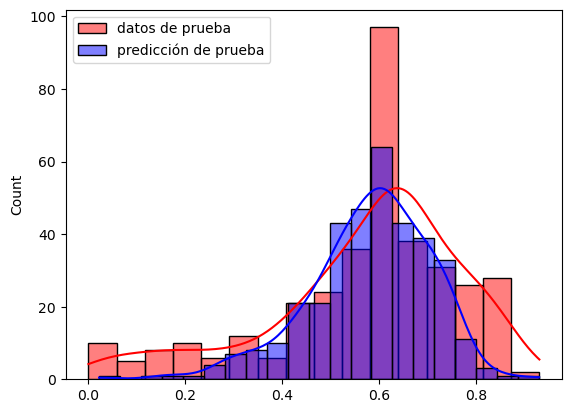

In [38]:
pred_test_3 = modelo_3_final.predict(X_test)
pred_test_3 = modelo_3_final.predict(X_test)

pred_test_desc3 = pred_test_3 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc3 = pred_test_3 * (np.max(y) - np.min(y)) + np.min(y)

y_test_desc3 = y_test * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc3 = y_test * (np.max(y) - np.min(y)) + np.min(y)

r2_test3 = r2_score(y_test_desc3, pred_test_desc3)
rmse_test3 = np.sqrt(mean_squared_error(y_test_desc3, pred_test_desc3))
mae_test3 = mean_absolute_error(y_test_desc3, pred_test_desc3)
mape_test3 = mean_absolute_percentage_error(y_test_desc3, pred_test_desc3)

print('metricas de desempeño de prueba para la regresion lineal')
print(f'R2: {r2_test3}\nRMSE: {rmse_test3}\nMAE: {mae_test3}\nMAPE: {mape_test3}')

sns.histplot(y_test_desc3.values.flatten(), color='red', label='datos de prueba', kde=True)
sns.histplot(pred_test_desc3.flatten(), color='blue', label='predicción de prueba', kde=True)
plt.legend() 
plt.show()

### Arbol de desición para reg

El árbol para regresión se dan por la minimización del error, entre más me parezca a mi valor real menor es el error  
Cada rama que crea el árbol es una creación de una nueva región   
Crece hasta que en cada hoja hay un solo individuo, llegamos a un sobre ajuste la mayoría de las veces, hay que manejar esto  
Vamos a determinar una cantidad de individuos por hoja y nuestra predicción va a ser la media de los valores de esta hoja   

ERRORES:   
 Poisson  
 Mse  


In [41]:
modelo_4 = DecisionTreeRegressor()

param_grid = {'criterion' : ['friedman_mse' , 'poisson', 'squared_error' , 'absolute_error'] , 'max_depth' : [None , 4 , 4, 5, 10 ,100],
              'min_samples_split' : [2,3] , 'max_leaf_nodes' : [None, 2, 3, 4] }


reg_4 = GridSearchCV(estimator=modelo_4, param_grid = param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')
reg_4.fit(X_train, y_train)

validation = pd.concat([pd.DataFrame(reg_4.cv_results_['params']),
                        pd.DataFrame(reg_4.cv_results_['mean_test_score'], columns=['MAPE'])], axis=1)
validation.sort_values('MAPE', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,MAPE
144,absolute_error,NaN,NaN,2,-0.598281
176,absolute_error,10.0,NaN,2,-0.601334
177,absolute_error,10.0,NaN,3,-0.616962
49,poisson,NaN,NaN,3,-0.619008
145,absolute_error,NaN,NaN,3,-0.623011
...,...,...,...,...,...
187,absolute_error,100.0,2.0,3,-0.810832
154,absolute_error,4.0,2.0,2,-0.810832
147,absolute_error,NaN,2.0,3,-0.810832
146,absolute_error,NaN,2.0,2,-0.810832


In [43]:
modelo_4_final = reg_4.best_estimator_
modelo_4_final

DecisionTreeRegressor(criterion='absolute_error')

metricas de desempeño de prueba para la regresion lineal
R2: 0.9952593358751916
RMSE: 0.01346601816194013
MAE: 0.00222855429564462
MAPE: 0.008571856009572184


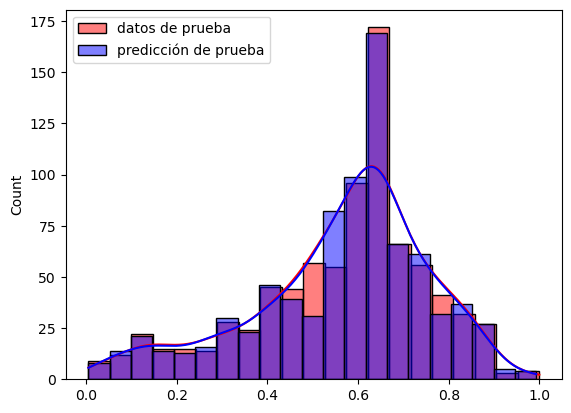

In [44]:
pred_train_4 = modelo_4_final.predict(X_train)
pred_test_4 = modelo_4_final.predict(X_test)

pred_train_desc4 = pred_train_4 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc4 = pred_test_4 * (np.max(y) - np.min(y)) + np.min(y)

y_train_desc4 = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc4 = y_test * (np.max(y) - np.min(y)) + np.min(y)

r2_train4 = r2_score(y_train_desc4, pred_train_desc4)
rmse_train4 = np.sqrt(mean_squared_error(y_train_desc4, pred_train_desc4))
mae_train4 = mean_absolute_error(y_train_desc4, pred_train_desc4)
mape_train4 = mean_absolute_percentage_error(y_train_desc4, pred_train_desc4)

print('metricas de desempeño de prueba para la regresion lineal')
print(f'R2: {r2_train4}\nRMSE: {rmse_train4}\nMAE: {mae_train4}\nMAPE: {mape_train4}')

sns.histplot(y_train_desc4.values.flatten(), color='red', label='datos de prueba', kde=True)
sns.histplot(pred_train_desc4.flatten(), color='blue', label='predicción de prueba', kde=True)
plt.legend() 
plt.show()

metricas de desempeño de prueba para la regresion lineal
R2: -0.18747834850110134
RMSE: 0.21690399511143754
MAE: 0.13885216439508374
MAPE: 3079871999937.2476


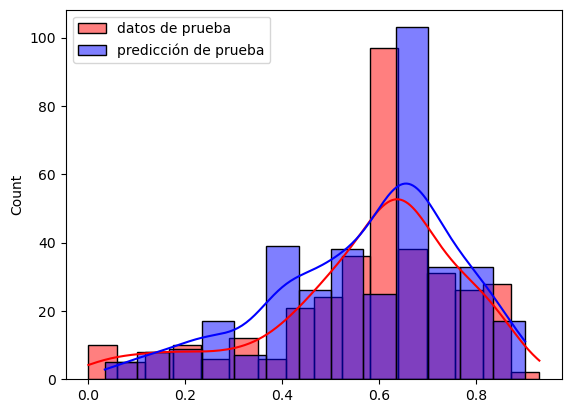

In [45]:
pred_test_4 = modelo_4_final.predict(X_test)
pred_test_4 = modelo_4_final.predict(X_test)

pred_test_desc4 = pred_test_4 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc4 = pred_test_4 * (np.max(y) - np.min(y)) + np.min(y)

y_test_desc4 = y_test * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc4 = y_test * (np.max(y) - np.min(y)) + np.min(y)

r2_test4 = r2_score(y_test_desc4, pred_test_desc4)
rmse_test4 = np.sqrt(mean_squared_error(y_test_desc4, pred_test_desc4))
mae_test4 = mean_absolute_error(y_test_desc4, pred_test_desc4)
mape_test4 = mean_absolute_percentage_error(y_test_desc4, pred_test_desc4)

print('metricas de desempeño de prueba para la regresion lineal')
print(f'R2: {r2_test4}\nRMSE: {rmse_test4}\nMAE: {mae_test4}\nMAPE: {mape_test4}')

sns.histplot(y_test_desc4.values.flatten(), color='red', label='datos de prueba', kde=True)
sns.histplot(pred_test_desc4.flatten(), color='blue', label='predicción de prueba', kde=True)
plt.legend() 
plt.show()